The goal of this project is to attempt to predict the causes of wildfires given data such as location,month and year. I did not consider 'fire size' as feature because the goal is to predict cause of wildfire at its initial phase where fire_size is small.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import tree, preprocessing
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
US_fires_data = pd.read_csv("/content/drive/My Drive/Springboard/US_Widfires_cleanData.csv")
US_fires_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838525 entries, 0 to 1838524
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   GLOBAL_UNIQUE_ID  int64  
 2   DISCOVERY_DATE    object 
 3   FIRE_YEAR         int64  
 4   STAT_CAUSE_DESCR  object 
 5   FIRE_SIZE         float64
 6   FIRE_SIZE_CLASS   object 
 7   STATE             object 
 8   STATE_NAME        object 
 9   COUNTY_NAME       object 
 10  LATITUDE          float64
 11  LONGITUDE         float64
 12  DISCOVERY_DOY     int64  
 13  OWNER_DESCR       object 
 14  FIPS_CODE         float64
dtypes: float64(4), int64(4), object(7)
memory usage: 210.4+ MB


Taking only Date, Fire size and location related columns from dataframe which I will be using as features in machine learning model.

In [4]:
US_fires_data = US_fires_data[['DISCOVERY_DATE','FIRE_YEAR','STATE','LATITUDE','LONGITUDE','STAT_CAUSE_DESCR']]
US_fires_data.head()


,DISCOVERY_DATE,FIRE_YEAR,STATE,LATITUDE,LONGITUDE,STAT_CAUSE_DESCR
0,2005-02-02,2005,CA,40.036944,-121.005833,Miscellaneous
1,2004-05-12,2004,CA,38.933056,-120.404444,Lightning
2,2004-05-31,2004,CA,38.984167,-120.735556,Debris Burning
3,2004-06-28,2004,CA,38.559167,-119.913333,Lightning
4,2004-06-28,2004,CA,38.559167,-119.933056,Lightning


Keeping only month data from date of fire and dropping 'Discovery_Date' column


In [5]:
US_fires_data['MONTH'] = pd.DatetimeIndex(US_fires_data['DISCOVERY_DATE']).month
US_fires_data = US_fires_data.drop('DISCOVERY_DATE',axis=1)

In [6]:
US_fires_data_CA = US_fires_data[US_fires_data['STATE']=='CA']
US_fires_data_orig = US_fires_data.copy()

I will convert all features to numeric values, this is necessary for the machine learning stage.

In [7]:
le = preprocessing.LabelEncoder()
US_fires_data['STAT_CAUSE_DESCR'] = le.fit_transform(US_fires_data['STAT_CAUSE_DESCR'])
US_fires_data['STATE'] = le.fit_transform(US_fires_data['STATE'])
print(US_fires_data.head())

   FIRE_YEAR  STATE   LATITUDE   LONGITUDE  STAT_CAUSE_DESCR  MONTH
0       2005      4  40.036944 -121.005833                 7      2
1       2004      4  38.933056 -120.404444                 6      5
2       2004      4  38.984167 -120.735556                 3      5
3       2004      4  38.559167 -119.913333                 6      6
4       2004      4  38.559167 -119.933056                 6      6


In [8]:
cause_label=[]
causecodeDict = dict(zip(US_fires_data['STAT_CAUSE_DESCR'], US_fires_data_orig['STAT_CAUSE_DESCR']))
print(causecodeDict)
for key in sorted(causecodeDict):
    cause_label.append(causecodeDict[key])
print(cause_label)

{7: 'Miscellaneous', 6: 'Lightning', 3: 'Debris Burning', 1: 'Campfire', 4: 'Equipment Use', 0: 'Arson', 10: 'Railroad', 2: 'Children', 11: 'Smoking', 8: 'Missing/Undefined', 12: 'Structure', 5: 'Fireworks', 9: 'Powerline'}
['Arson', 'Campfire', 'Children', 'Debris Burning', 'Equipment Use', 'Fireworks', 'Lightning', 'Miscellaneous', 'Missing/Undefined', 'Powerline', 'Railroad', 'Smoking', 'Structure']


The goal is to predict the cause of the fire = STAT_CAUSE_DESCR. Since I'll be using supervised learning I need to create training and test datasets

Features/Predicted Variable = FIRE_YEAR,STATE,LONGITUDE,LATITUDE,MONTH Target Variable = STAT_CAUSE_DESCR

I have spilt data in 30% for testing, 70% for training

In [9]:
X = US_fires_data.drop(['STAT_CAUSE_DESCR'], axis=1).values
y = US_fires_data['STAT_CAUSE_DESCR'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(dt.score(X_test,y_test))

0.4897454120872148


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
grb = GradientBoostingRegressor()
grb.fit(X_train, y_train)
print(grb.score(X_test,y_test))

0.16901858125034885


I have tried applying Decision Tree Algorithm and Gradient Boosting Decision Tree Algorithm to the data. The prdeiction score is aproximately 49% and 17% respectively. I will try to fit my data to Random Forest Algorithm to test if predictibility gets any better.

In [11]:
clf_rf = ske.RandomForestClassifier(n_estimators=60)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.5668796391313334


In [56]:
training_accuracy = clf_rf.score(X_train, y_train)
test_accuracy = clf_rf.score(X_test, y_test)
print("Accuracy on training data: {:0.2f}".format(training_accuracy))
print("Accuracy on test data:     {:0.2f}".format(test_accuracy))

Accuracy on training data: 0.74
Accuracy on test data:     0.57


I have used Random Forest Algorithm here as I think that fits my dataset well than Decision tree classifier. The prediction score of this model is approximately 57%, with Training data accuracy 74%. We can clearly see that this model is overfitting.

An overfit model may look impressive on the training set, but will be useless in a real application. Therefore, I will try to tune hyperparameter.The standard procedure for hyperparameter optimization accounts for overfitting through cross validation.  Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

Below are the default parameters used other than n_estimator value which i have chosen to be 60. Higher n_estimator may yield to better results but I am running into timeout/memory error with higher values.

In [12]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf_rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 60,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


To use RandomizedSearchCV, I have created a parameter grid. I tried using wide range of values but due to limited RAM access narrowed the range of values.

In [23]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [60]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [90]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True],
 'max_depth': [90],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [60]}


The arguments in RandomizedSearchCV 
   n_iter=100, which controls the number of different combinations to try, 
   and cv=3 which is the number of folds to use for cross validation. 
More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each has increased the run time and at time lead to memory error.

In [24]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = ske.RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


In [25]:
# Fit the random search model
rf_random.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 30.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [26]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 60}

To determine if random search yielded a better model, I again created RandomForest model with best parameters obtained using RandomizedSearchCV method. 

In [28]:
clf_rf = ske.RandomForestClassifier(n_estimators=60,bootstrap=True,max_depth= 90,max_features= 'sqrt',min_samples_leaf= 4,
 min_samples_split= 5)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.5837427795444904


In [29]:
training_accuracy = clf_rf.score(X_train, y_train)
test_accuracy = clf_rf.score(X_test, y_test)
print("Accuracy on training data: {:0.2f}".format(training_accuracy))
print("Accuracy on test data:     {:0.2f}".format(test_accuracy))

Accuracy on training data: 0.75
Accuracy on test data:     0.58


In [30]:
from sklearn.metrics import confusion_matrix
y_pred = clf_rf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(cm)

[[45874   495   784 21808  2022   150  1977  8715  1143    35   262   164
      3]
 [ 1256  6586   169  4802   712    58  5001  3235   547    22   131   125
      3]
 [ 2477   258  2544  6719  1079   199   948  2995   315    11   497   143
     16]
 [15111  1407   901 91182  3031   192  3141 10682   946   102   678   297
     19]
 [ 3039   467   335 12679 12603   119  3583  9227   862   107  1055   170
     11]
 [  331    49   101   487   125  1375   335   472    63    10     9     8
      0]
 [ 1253  1080   101  3880  1240    97 67725  4341  1127    34   346   101
      0]
 [ 6435  1805   641 20065  5708   266  6104 52113  1835   142   809   321
      3]
 [  569   222    30  1222   377    21  2307  1836 36702    11     9    33
      0]
 [  257    50    24  1402   393    27   449  1268   100   288    10    12
      1]
 [  533   203    63  1887   823     7   904   714    77     5  4636    38
      0]
 [ 1471   621   269  5742  1032    58  1241  4055   306    21   216   698
      1]
 [  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


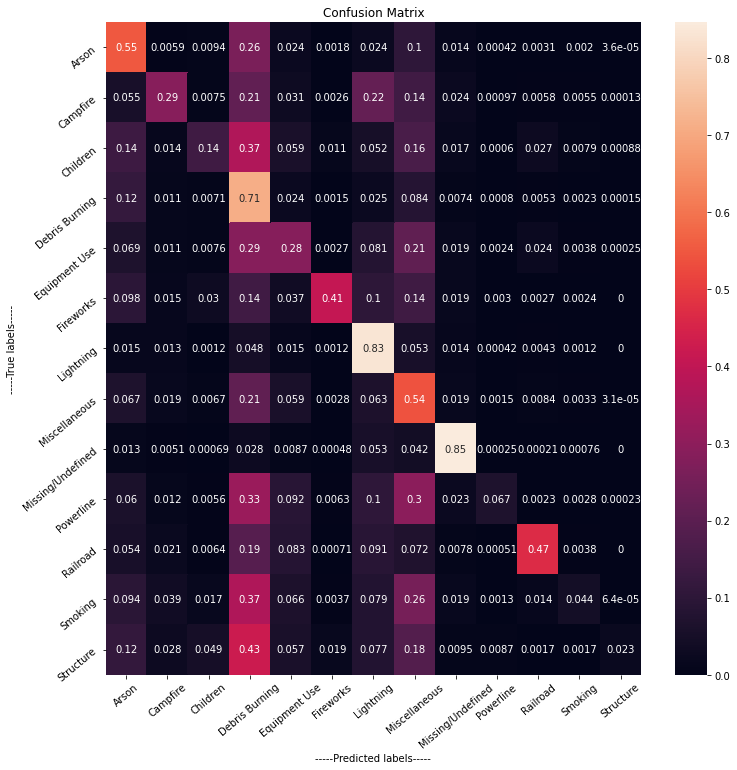

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt     
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
f = plt.figure(figsize=(12,12))
ax= plt.subplot()
sns.heatmap(cmn, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('-----Predicted labels-----');ax.set_ylabel('-----True labels-----'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(cause_label, rotation=40);
ax.yaxis.set_ticklabels(cause_label, rotation=40);

We achieved an unspectacular improvement in accuracy of 1%. 

There are a lot of different Cause classes, I wanted to put some of these together and have just 3 classes for the cause of fires. Then test again to see if the score improves.

The 3 classes are: lightning, human_caused and Unidentified/other

where lightning = ['Lightning']

human_caused = ['Arson','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']

Unidentified/other = ['Missing/Undefined','Miscellaneous','Structure']

I've now replaced STAT_CAUSE_DESCR with LABEL. So now I tried to predict LABEL.Also I will be passing best parameter values obtained by RandomSearchCV method.

In [32]:
def set_label(cat):
    cause = 0
    natural = ['Lightning']
    human_caused = ['Fireworks','Smoking','Campfire','Debris Burning','Powerline','Railroad','Equipment Use','Arson','Children','Structure'] 
    other = ['Missing/Undefined','Miscellaneous']
    if cat in natural:
        cause = 1
    elif cat in human_caused:
        cause = 2
    elif cat in other:
        cause = 3
    return cause
     

US_fires_data['LABEL'] = US_fires_data_orig['STAT_CAUSE_DESCR'].apply(lambda x: set_label(x)) # I created a copy of the original df earlier in the kernel
US_fires_data = US_fires_data.drop('STAT_CAUSE_DESCR',axis=1)
print(US_fires_data.head())

   FIRE_YEAR  STATE   LATITUDE   LONGITUDE  MONTH  LABEL
0       2005      4  40.036944 -121.005833      2      3
1       2004      4  38.933056 -120.404444      5      1
2       2004      4  38.984167 -120.735556      5      2
3       2004      4  38.559167 -119.913333      6      1
4       2004      4  38.559167 -119.933056      6      1


In [33]:
X = US_fires_data.drop(['LABEL'], axis=1).values
y = US_fires_data['LABEL'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
clf_rf_class = ske.RandomForestClassifier(n_estimators=60,bootstrap=True,max_depth= 90,max_features= 'sqrt',min_samples_leaf= 4,
 min_samples_split= 5)
clf_rf_class = clf_rf_class.fit(X_train, y_train)
print(clf_rf_class.score(X_test,y_test))

0.7952744770268947


In [34]:
training_accuracy = clf_rf_class.score(X_train, y_train)
test_accuracy = clf_rf_class.score(X_test, y_test)
print("Accuracy on training data: {:0.2f}".format(training_accuracy))
print("Accuracy on test data:     {:0.2f}".format(test_accuracy))

Accuracy on training data: 0.88
Accuracy on test data:     0.80


Reducing the number of catagories improved the prediction score significantly (from around 58% to 80%). Prediction score is a good metric to measure success but we can look at other metrics like confusion matrix.

In [36]:
y_pred = clf_rf_class.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(cm)

[[ 63198  14102   4025]
 [ 10935 297282  22430]
 [  5975  55717  77894]]


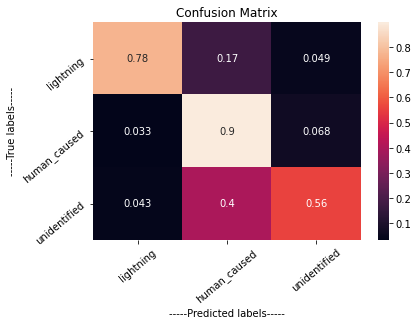

In [37]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ax= plt.subplot()
sns.heatmap(cmn, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('-----Predicted labels-----');ax.set_ylabel('-----True labels-----'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['lightning', 'human_caused','unidentified'],rotation=40); ax.yaxis.set_ticklabels(['lightning', 'human_caused','unidentified'],rotation=40);

The random forest algorithm did well with the first two labels: lightning(78%) and human_caused (90%) but did not do as well with the 'unidentified' label. It labeled 40% of unidentified label as human_caused fire.

Given that it is easier to make accurate predictions if the number of classes is reduced,I wanted to look at just one state at a time and build a system that can predict cause in that State. First I wanted to see How well model predicts only for California.

In [38]:
print(US_fires_data_CA.head())

   FIRE_YEAR STATE   LATITUDE   LONGITUDE STAT_CAUSE_DESCR  MONTH
0       2005    CA  40.036944 -121.005833    Miscellaneous      2
1       2004    CA  38.933056 -120.404444        Lightning      5
2       2004    CA  38.984167 -120.735556   Debris Burning      5
3       2004    CA  38.559167 -119.913333        Lightning      6
4       2004    CA  38.559167 -119.933056        Lightning      6


In [39]:
US_fires_data_CA['LABEL'] = US_fires_data_CA_orig['STAT_CAUSE_DESCR'].apply(lambda x: set_label(x)) # I created a copy of the original df earlier in the kernel
US_fires_data_CA = US_fires_data_CA.drop('STAT_CAUSE_DESCR',axis=1)
print(US_fires_data_CA.head())

   FIRE_YEAR STATE   LATITUDE   LONGITUDE  MONTH  LABEL
0       2005    CA  40.036944 -121.005833      2      3
1       2004    CA  38.933056 -120.404444      5      1
2       2004    CA  38.984167 -120.735556      5      2
3       2004    CA  38.559167 -119.913333      6      1
4       2004    CA  38.559167 -119.933056      6      1


In [41]:
le = preprocessing.LabelEncoder()
US_fires_data_CA['STATE'] = le.fit_transform(US_fires_data_CA['STATE'])

In [42]:
X = US_fires_data_CA.drop(['LABEL'], axis=1).values
y = US_fires_data_CA['LABEL'].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [44]:
clf_rf = ske.RandomForestClassifier(n_estimators=60,bootstrap=True,max_depth= 90,max_features= 'sqrt',min_samples_leaf= 4,
 min_samples_split= 5)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.6589259796806967


In [45]:
training_accuracy = clf_rf.score(X_train, y_train)
test_accuracy = clf_rf.score(X_test, y_test)
print("Accuracy on training data: {:0.2f}".format(training_accuracy))
print("Accuracy on test data:     {:0.2f}".format(test_accuracy))

Accuracy on training data: 0.84
Accuracy on test data:     0.66


The generic model accuracy(80%) was significantly more compared to model per state(66%).

I wanted to check if taking random sample of the dataset and applying Random Forest Classifier Algorithm on this sample would yield more effiecient model. Thus I took 60% of dataset randomly and built a classifier.

In [47]:
US_fires_data_latest = US_fires_data_orig.sample(frac=0.6, random_state=42)
US_fires_data_latest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103115 entries, 1783935 to 775594
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   FIRE_YEAR         1103115 non-null  int64  
 1   STATE             1103115 non-null  object 
 2   LATITUDE          1103115 non-null  float64
 3   LONGITUDE         1103115 non-null  float64
 4   STAT_CAUSE_DESCR  1103115 non-null  object 
 5   MONTH             1103115 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 58.9+ MB


In [48]:
US_fires_data_latest.head()

,FIRE_YEAR,STATE,LATITUDE,LONGITUDE,STAT_CAUSE_DESCR,MONTH
1783935,2010,LA,31.206360,-92.773360,Arson,10
962960,2012,MT,45.254903,-106.521300,Lightning,8
1568920,1999,OK,36.038600,-94.966900,Debris Burning,1
1332491,1992,AZ,33.066700,-111.750700,Miscellaneous,5
1428332,1992,FL,28.516667,-80.666667,Lightning,7


In [49]:
le = preprocessing.LabelEncoder()
US_fires_data_latest['STAT_CAUSE_DESCR'] = le.fit_transform(US_fires_data_latest['STAT_CAUSE_DESCR'])
US_fires_data_latest['STATE'] = le.fit_transform(US_fires_data_latest['STATE'])
print(US_fires_data_latest.head())

         FIRE_YEAR  STATE   LATITUDE   LONGITUDE  STAT_CAUSE_DESCR  MONTH
1783935       2010     17  31.206360  -92.773360                 0     10
962960        2012     25  45.254903 -106.521300                 6      8
1568920       1999     35  36.038600  -94.966900                 3      1
1332491       1992      3  33.066700 -111.750700                 7      5
1428332       1992      8  28.516667  -80.666667                 6      7


In [50]:
X = US_fires_data_latest.drop(['STAT_CAUSE_DESCR'], axis=1).values
y = US_fires_data_latest['STAT_CAUSE_DESCR'].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [54]:
clf_rf = ske.RandomForestClassifier(n_estimators=60,bootstrap=True,max_depth= 90,max_features= 'sqrt',min_samples_leaf= 4,
 min_samples_split= 5)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.5737138713040325


In [55]:
training_accuracy = clf_rf.score(X_train, y_train)
test_accuracy = clf_rf.score(X_test, y_test)
print("Accuracy on training data: {:0.2f}".format(training_accuracy))
print("Accuracy on test data:     {:0.2f}".format(test_accuracy))

Accuracy on training data: 0.74
Accuracy on test data:     0.57


Model using the subset of dataset did not yeild any better result. The accuracy is exactly same as model built using full dataset.

we can predict the cause of these wildfires using the data provided, at least to an accuracy of 58% or better. Reducing the number of labels significantly improves the prediction score to 80% for the random forest algorithm.